In [41]:
# For these lessons we will need NumPy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# and of course the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [42]:
df=pd.read_csv('GoldUP.csv')
df

,Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
0,01-10-2000,4538,1455.51,8.00,46.318297,3711.02,37.23,116.65
1,01-11-2000,4483,1512.47,8.00,46.783613,3997.99,37.31,115.24
2,01-12-2000,4541,1178.11,8.00,46.745856,3972.12,36.98,109.56
3,01-01-2001,4466,1208.18,8.00,46.536033,4326.72,36.90,110.52
4,01-02-2001,4370,1267.18,7.50,46.514595,4247.04,36.73,112.01
...,...,...,...,...,...,...,...,...
234,01-04-2020,45504,1603.02,4.65,76.222334,33717.62,125.85,99.57
235,01-05-2020,46343,2298.55,4.25,75.666063,32424.10,126.24,98.34
236,01-06-2020,47315,2987.46,4.25,75.763427,34915.80,127.00,97.39
237,01-07-2020,49878,3156.01,4.25,74.908993,37606.89,128.53,93.35


In [43]:
train,test= train_test_split(df,test_size = 0.30,random_state=0)

x=train[['Crude_Oil','Interest_Rate','USD_INR','Sensex','CPI','USD_Index']]
y=train['Gold_Price']


In [44]:
# We start by creating a linear regression object
reg = LinearRegression()

# The whole learning process boils down to fitting the regression
reg.fit(x,y)

print(f'Gold price = {reg.coef_[0]} * Crude_Oil + {reg.coef_[1]} * Interest_Rate + {reg.coef_[2]} *  USD_INR + {reg.coef_[3]} * Sensex + {reg.coef_[4]} * CPI + {reg.coef_[5]} * USD_Index + {reg.intercept_} with R-squared = {reg.score(x,y)} ')

Gold price = 1.2967798002929316 * Crude_Oil + -830.1125841207039 * Interest_Rate + -248.25181675188898 *  USD_INR + -0.7358749872997723 * Sensex + 709.8580996215653 * CPI + -30.71939429468341 * USD_Index + -1946.6464816324005 with R-squared = 0.9587708478499475 


In [45]:
y_predict = reg.predict(test[['Crude_Oil','Interest_Rate','USD_INR','Sensex','CPI','USD_Index']])

new_df=test.iloc[:,1:2]
new_df.columns=['vaild price']
new_df['predict price']=y_predict.astype('int64')
new_df['difference']=new_df['vaild price']-new_df['predict price']
new_df

C:\Users\new laptop\AppData\Local\Temp\ipykernel_6788\303493376.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['predict price']=y_predict.astype('int64')
C:\Users\new laptop\AppData\Local\Temp\ipykernel_6788\303493376.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['difference']=new_df['vaild price']-new_df['predict price']


,vaild price,predict price,difference
178,25729,28321,-2592
153,26928,29954,-3026
106,14952,15637,-685
111,16706,18480,-1774
125,20835,21861,-1026
...,...,...,...
4,4370,1430,2940
104,14639,13941,698
61,7168,8275,-1107
160,30211,30248,-37


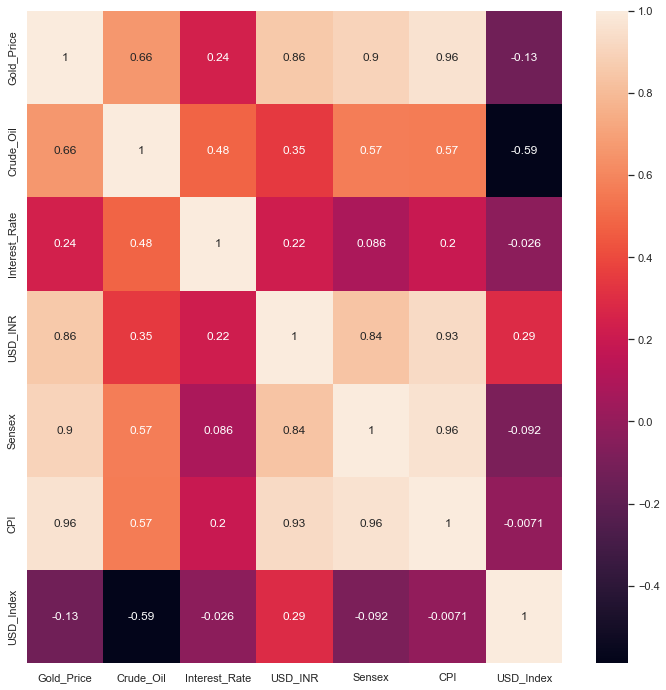

In [46]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

C:\Users\new laptop\AppData\Local\Temp\ipykernel_6788\3907661080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.sort_index(inplace=True)


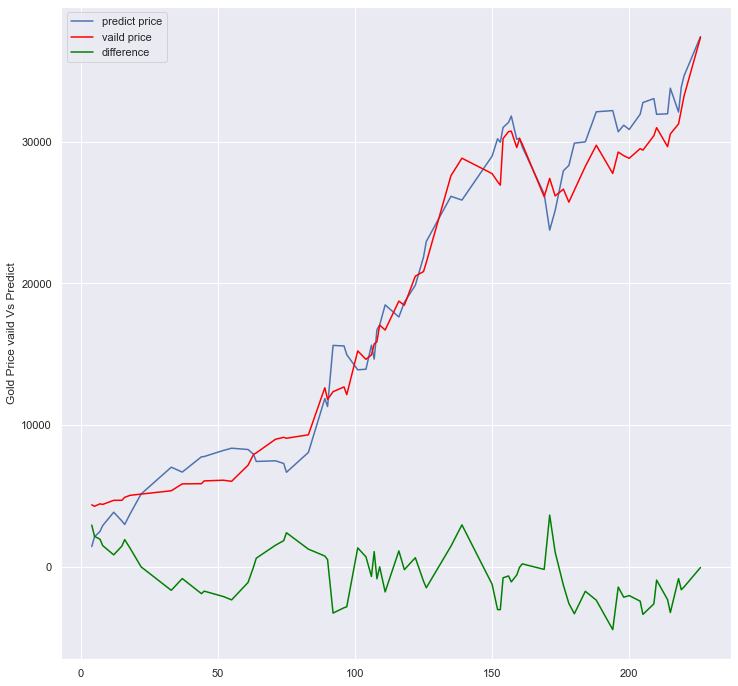

In [47]:

new_df.sort_index(inplace=True)
plt.figure(figsize=(12,12))
plt.plot(new_df['predict price'],label='predict price')
plt.plot(new_df['vaild price'],color="red",label='vaild price')

plt.plot(new_df['difference'],color="green",label='difference')
plt.legend()
plt.ylabel("Gold Price vaild Vs Predict")
plt.show()